In [23]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense,Flatten,MaxPool2D
import numpy as np

In [24]:
datagen=ImageDataGenerator(rescale=1/255,horizontal_flip=True,rotation_range=10)

In [25]:
train=datagen.flow_from_directory('/home/user/Downloads/Face Mask Dataset/Train',target_size=(224,224),batch_size=30)
test=datagen.flow_from_directory('/home/user/Downloads/Face Mask Dataset/Test',target_size=(224,224),batch_size=30)

Found 9944 images belonging to 2 classes.
Found 986 images belonging to 2 classes.


In [26]:
class_labels=train.class_indices
class_labels={k:v for v,k in class_labels.items()}
classes = list(class_labels.values())
class_labels

{0: 'WithMask', 1: 'WithoutMask'}

WithoutMask


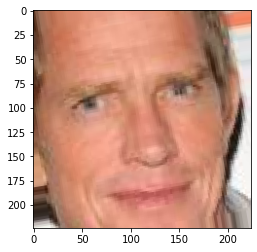

WithoutMask


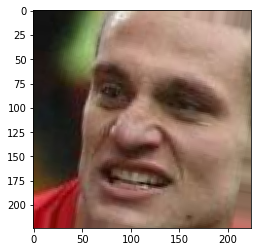

WithMask


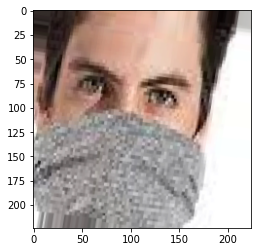

WithMask


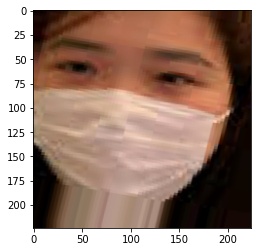

WithMask


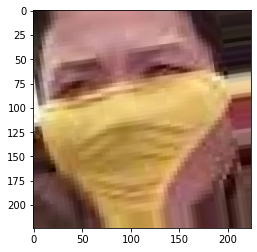

WithMask


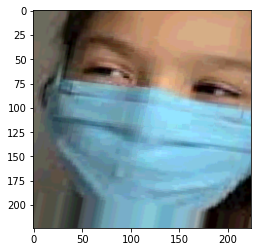

In [27]:
for i in [0,5,10,15,20,25]:
    result=np.argmax(train[0][1][i])
    print(classes[result])
    plt.imshow(train[0][0][i])
    plt.show()

In [28]:
vgg=MobileNetV2(weights='imagenet')
for layer in vgg.layers:
    layer.trainable = False

In [29]:
vgg_input = vgg.layers[0].input
vgg_output = vgg.layers[-2].output
predictions = Dense(2,activation='softmax')(vgg_output)
model=Model(inputs = vgg_input,outputs = predictions)

In [30]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [31]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics='accuracy')

In [32]:
callbacks=[ModelCheckpoint('face_mask.h5',verbose=1,save_best_only=True),
          EarlyStopping(patience=5,monitor='val_loss')]
result=model.fit(train,validation_data=test,epochs=50,callbacks=callbacks)

Epoch 1/50
332/332 [==============================] - ETA: 0s - loss: 0.1223 - accuracy: 0.9590
Epoch 00001: val_loss improved from inf to 0.04685, saving model to face_mask.h5
332/332 [==============================] - 197s 592ms/step - loss: 0.1223 - accuracy: 0.9590 - val_loss: 0.0469 - val_accuracy: 0.9899
Epoch 2/50
332/332 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9802
Epoch 00002: val_loss improved from 0.04685 to 0.03774, saving model to face_mask.h5
332/332 [==============================] - 195s 587ms/step - loss: 0.0646 - accuracy: 0.9802 - val_loss: 0.0377 - val_accuracy: 0.9878
Epoch 3/50
332/332 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9837
Epoch 00003: val_loss improved from 0.03774 to 0.03406, saving model to face_mask.h5
332/332 [==============================] - 212s 640ms/step - loss: 0.0545 - accuracy: 0.9837 - val_loss: 0.0341 - val_accuracy: 0.9899
Epoch 4/50
332/332 [==============================] - ET

In [35]:
model.evaluate(test)

33/33 [==============================] - 16s 496ms/step - loss: 0.0391 - accuracy: 0.9858


[0.03914296254515648, 0.9858012199401855]


actual =  WithMask
predicted =  WithMask
[[9.9994004e-01 5.9991216e-05]]


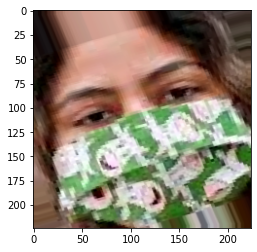


actual =  WithMask
predicted =  WithMask
[[9.9999344e-01 6.4989404e-06]]


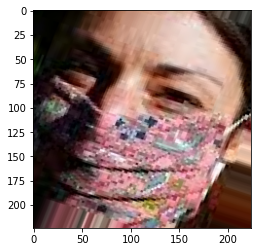


actual =  WithMask
predicted =  WithMask
[[0.99419135 0.00580865]]


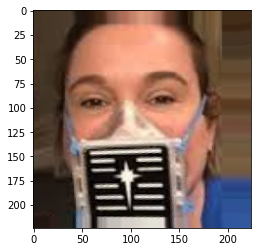


actual =  WithMask
predicted =  WithMask
[[9.9982822e-01 1.7173504e-04]]


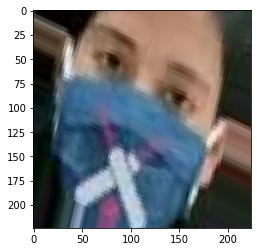


actual =  WithMask
predicted =  WithMask
[[9.992035e-01 7.965494e-04]]


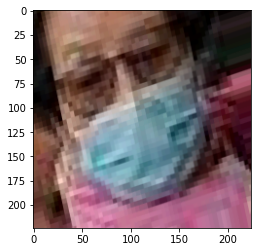


actual =  WithoutMask
predicted =  WithoutMask
[[4.718314e-05 9.999528e-01]]


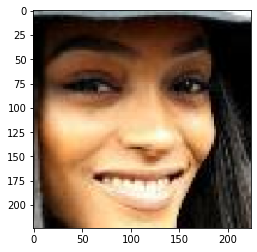


actual =  WithoutMask
predicted =  WithoutMask
[[4.3605445e-07 9.9999952e-01]]


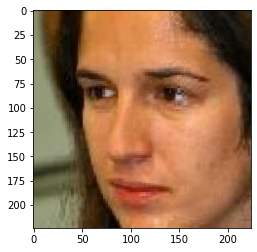


actual =  WithMask
predicted =  WithMask
[[9.997402e-01 2.598099e-04]]


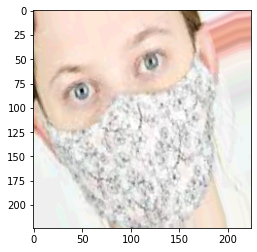

In [36]:
for i in range(0,30,4):
    result=np.argmax(test[0][1][i])
    print('\nactual = ',classes[result])
    test_image=np.expand_dims(test[0][0][i],axis=0)
    print('predicted = ',classes[np.argmax(model.predict(test_image))])
    print(model.predict(test_image))
    plt.imshow(test[0][0][i])
    plt.show()